## Import Library

In [ ]:
!pip install scikeras

In [ ]:
! pip install scikit-learn==1.4.2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 113.5 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.1
    Uninstalling scikit-learn-1.6.1:
      Successfully uninstalled scikit-learn-1.6.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
umap-learn 0.5.9.post2 requires scikit-learn>=1.6, but you have scikit-learn 1.4.2 which is incompatible.


In [82]:
# Import pustaka yang digunakan untuk analisis data dan visualisasi
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, normalize, StandardScaler
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE

import math

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

from time import time
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from scikeras.wrappers import KerasClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc


## Data Loading

In [ ]:
# Membaca dataset dari Google Drive dan menampilkannya
url = 'https://drive.google.com/uc?id=1N8ECUikDiRAyYbdr8KIJMaBtWcN7tWwp'
df = pd.read_csv(url, sep=';')

# Melihat 5 baris pertama data
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


## Exploratory / Diagnostic EDA

In [ ]:
# Informasi struktur data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [ ]:
# Menampilkan nama-nama kolom
df.columns.values

array(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'], dtype=object)

In [ ]:
# Menampilkan index (baris) data
df.index.values

array([    0,     1,     2, ..., 41185, 41186, 41187])

In [ ]:
# Memisahkan kolom numerik dan kategorik untuk analisis lebih lanjut
kolom_numerik = list(df.select_dtypes(include=['int64']).columns.values) + list (df.select_dtypes(include=['float64']).columns.values)
kolom_kategori = list(df.select_dtypes(include=['object']))

In [ ]:
# Menampilkan kolom numerik
kolom_numerik

['age',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed']

In [ ]:
# Menampilkan kolom kategorik
kolom_kategori

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome',
 'y']

In [ ]:
# Menampilkan ringkasan statistik data numerik
df[kolom_numerik].describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [ ]:
# Melihat jumlah data berdasarkan nilai target (kolom 'y')
df.groupby('y').count()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
y,,,,,,,,,,,,,,,,,,,,
no,36548,36548,36548,36548,36548,36548,36548,36548,36548,36548,36548,36548,36548,36548,36548,36548,36548,36548,36548,36548
yes,4640,4640,4640,4640,4640,4640,4640,4640,4640,4640,4640,4640,4640,4640,4640,4640,4640,4640,4640,4640


## Data Cleaning

In [ ]:
# Cek missing value
df.isnull().sum()

,0
age,0
job,0
marital,0
education,0
default,0
housing,0
loan,0
contact,0
month,0
day_of_week,0


In [ ]:
# Periksa jumlah unknown pada dataset kategori
df[df[kolom_kategori]=='unknown'].count().sort_values(ascending=False)

,0
default,8597
education,1731
housing,990
loan,990
job,330
marital,80
age,0
contact,0
month,0
day_of_week,0


In [ ]:
df[df[kolom_kategori]=='unknown'] = np.nan
df[df[kolom_kategori]=='unknown'].count().sort_values(ascending=False)

,0
age,0
job,0
marital,0
education,0
default,0
housing,0
loan,0
contact,0
month,0
day_of_week,0


In [ ]:
df[kolom_kategori].head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent,no
1,services,married,high.school,NaN,no,no,telephone,may,mon,nonexistent,no
2,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent,no
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent,no
4,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent,no


In [ ]:
df.isnull().sum()

,0
age,0
job,330
marital,80
education,1731
default,8597
housing,990
loan,990
contact,0
month,0
day_of_week,0


In [ ]:
for cat_column in kolom_kategori:
  print('Nilai unik kolom kategori: ', cat_column.upper())
  print(df[cat_column].unique())
  print('='*75)

Nilai unik kolom kategori:  JOB
['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' nan 'entrepreneur' 'student']
Nilai unik kolom kategori:  MARITAL
['married' 'single' 'divorced' nan]
Nilai unik kolom kategori:  EDUCATION
['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course' nan
 'university.degree' 'illiterate']
Nilai unik kolom kategori:  DEFAULT
['no' nan 'yes']
Nilai unik kolom kategori:  HOUSING
['no' 'yes' nan]
Nilai unik kolom kategori:  LOAN
['no' 'yes' nan]
Nilai unik kolom kategori:  CONTACT
['telephone' 'cellular']
Nilai unik kolom kategori:  MONTH
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
Nilai unik kolom kategori:  DAY_OF_WEEK
['mon' 'tue' 'wed' 'thu' 'fri']
Nilai unik kolom kategori:  POUTCOME
['nonexistent' 'failure' 'success']
Nilai unik kolom kategori:  Y
['no' 'yes']


In [ ]:
df[kolom_numerik].head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0


In [ ]:
for num_column in kolom_numerik:
  print('Nilai unik kolom numerik: ', num_column.upper())
  print(df[num_column].unique())
  print('='*75)

Nilai unik kolom numerik:  AGE
[56 57 37 40 45 59 41 24 25 29 35 54 46 50 39 30 55 49 34 52 58 32 38 44
 42 60 53 47 51 48 33 31 43 36 28 27 26 22 23 20 21 61 19 18 70 66 76 67
 73 88 95 77 68 75 63 80 62 65 72 82 64 71 69 78 85 79 83 81 74 17 87 91
 86 98 94 84 92 89]
Nilai unik kolom numerik:  DURATION
[ 261  149  226 ... 1246 1556 1868]
Nilai unik kolom numerik:  CAMPAIGN
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 19 18 23 14 22 25 16 17 15 20 56
 39 35 42 28 26 27 32 21 24 29 31 30 41 37 40 33 34 43]
Nilai unik kolom numerik:  PDAYS
[999   6   4   3   5   1   0  10   7   8   9  11   2  12  13  14  15  16
  21  17  18  22  25  26  19  27  20]
Nilai unik kolom numerik:  PREVIOUS
[0 1 2 3 4 5 6 7]
Nilai unik kolom numerik:  EMP.VAR.RATE
[ 1.1  1.4 -0.1 -0.2 -1.8 -2.9 -3.4 -3.  -1.7 -1.1]
Nilai unik kolom numerik:  CONS.PRICE.IDX
[93.994 94.465 93.918 93.444 93.798 93.2   92.756 92.843 93.075 92.893
 92.963 92.469 92.201 92.379 92.431 92.649 92.713 93.369 93.749 93.876
 94.055 94.215 94.0

In [ ]:
# Mengubah nilai 999 di pdays
df['pdays'].replace(999, 0, inplace=True)
df

/tmp/ipython-input-3427051190.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['pdays'].replace(999, 0, inplace=True)


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,NaN,no,no,telephone,may,mon,...,1,0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,0,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,0,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,0,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,0,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [ ]:
# Total missing values
print("Jumlah nan pada atribut kategori: ", df[kolom_kategori].isnull().sum().sum())
print("Jumlah nan pada atribut numerikal: ", df[kolom_numerik].isnull().sum().sum())

Jumlah nan pada atribut kategori:  12718
Jumlah nan pada atribut numerikal:  0


Untuk data kategori, missing value diisi dengan modus.

In [ ]:
# Data Kategori
df_categorical = df[kolom_kategori]
df_numerical = df[kolom_numerik]

imputer_cat = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imputer_cat.fit(df_categorical)
df_categorical = imputer_cat.transform(df_categorical)
df_categorical = pd.DataFrame(df_categorical, columns=kolom_kategori)
df_numerical_reset = df_numerical.reset_index(drop=True)

df = pd.concat([df_categorical, df_numerical_reset], axis=1)
new_column = df.columns.tolist()
new_column.remove('age')
new_column.insert(0, 'age')
df = df[new_column]
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,y,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,no,261,1,0,0,1.1,93.994,-36.4,4.857,5191.0
1,57,services,married,high.school,no,no,no,telephone,may,mon,...,no,149,1,0,0,1.1,93.994,-36.4,4.857,5191.0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,no,226,1,0,0,1.1,93.994,-36.4,4.857,5191.0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,no,151,1,0,0,1.1,93.994,-36.4,4.857,5191.0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,no,307,1,0,0,1.1,93.994,-36.4,4.857,5191.0


In [ ]:
# Cek ulang missing values
print("Jumlah nan pada atribut kategori: ", df[kolom_kategori].isnull().sum().sum())
print("Jumlah nan pada atribut numerikal: ", df[kolom_numerik].isnull().sum().sum())

Jumlah nan pada atribut kategori:  0
Jumlah nan pada atribut numerikal:  0


In [ ]:
# Cek duplikat data
df.duplicated().sum()

np.int64(14)

In [ ]:
# Drop duplikat data
df = df.drop_duplicates()
df.duplicated().sum()

np.int64(0)

In [ ]:
df.rename(columns={
    'day_of_week':'day',
    'y':'deposit',
    'pdays':'day_since_last_contact',
    'emp.var.rate':'employment_variation_rate',
    'cons.conf.idx':'consumer_confidence_index',
    'cons.price.idx':'consumer_price_index',
    'euribor3m':'euribor_3m_rate',
    'nr.employed':'number_of_employees',
}, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41174 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        41174 non-null  int64  
 1   job                        41174 non-null  object 
 2   marital                    41174 non-null  object 
 3   education                  41174 non-null  object 
 4   default                    41174 non-null  object 
 5   housing                    41174 non-null  object 
 6   loan                       41174 non-null  object 
 7   contact                    41174 non-null  object 
 8   month                      41174 non-null  object 
 9   day                        41174 non-null  object 
 10  poutcome                   41174 non-null  object 
 11  deposit                    41174 non-null  object 
 12  duration                   41174 non-null  int64  
 13  campaign                   41174 non-null  int64  


## Visualisasi Data

/tmp/ipython-input-1614859249.py:11: UserWarning: 'color' and 'colormap' cannot be used simultaneously. Using 'color'
  df['deposit'].value_counts().plot(


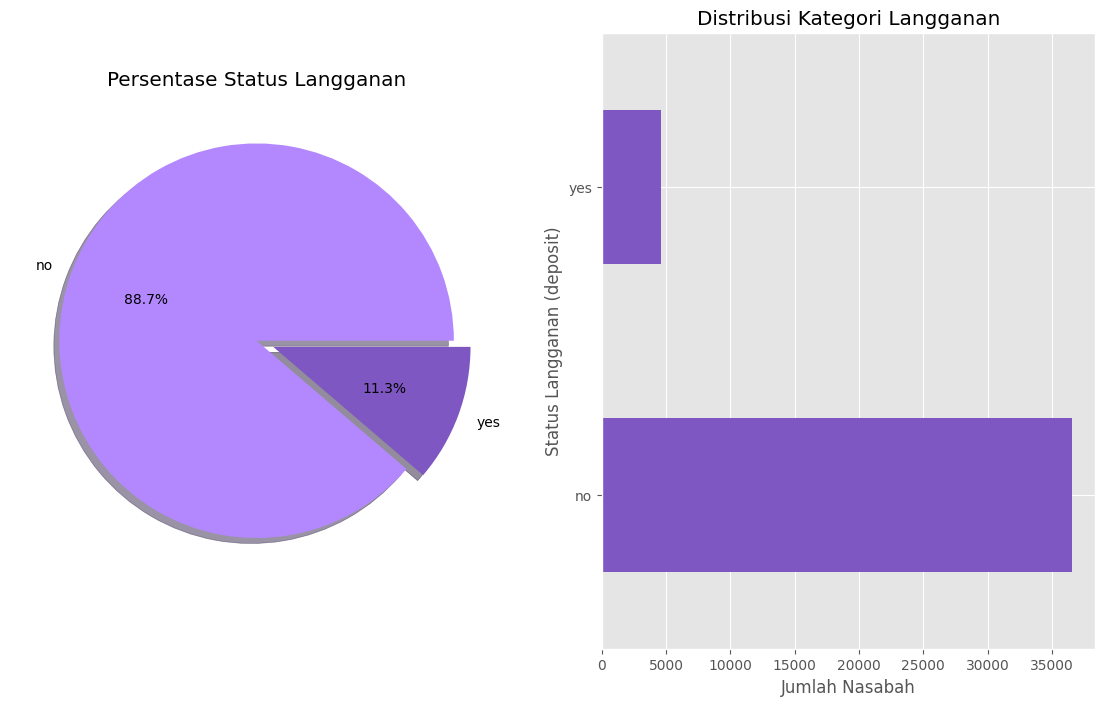

In [ ]:
# Mengatur gaya tampilan grafik agar mirip ggplot untuk visualisasi yang lebih rapi
mpl.style.use('ggplot')

# Melihat distribusi nilai pada kolom 'y' (jumlah nasabah yang berlangganan dan tidak)
df['deposit'].value_counts()

# Membuat dua grafik berdampingan: Pie Chart dan Bar Chart
fig, ax = plt.subplots(1, 2, figsize=(17, 9))

# Pie Chart - menampilkan persentase nasabah yang berlangganan deposito
df['deposit'].value_counts().plot(
    kind='pie',                      # Jenis grafik pie
    autopct='%.1f%%',                # Menampilkan persentase di setiap irisan
    colors=['#B388FF', '#7E57C2'],   # Warna grafik
    explode=[0, 0.09],               # Jarak antar irisan
    cmap='cool',                     # Palet warna tambahan
    shadow=True,                     # Memberi efek bayangan
    ax=ax[0]                         # Plot pada subplot pertama
)

# Menambahkan judul dan menghapus label sumbu Y pada Pie Chart
ax[0].set_title('Persentase Status Langganan')
ax[0].set_ylabel('')

# Bar Chart - menampilkan jumlah nasabah pada tiap kategori (yes/no)
df['deposit'].value_counts().plot(
    kind='barh',                     # Grafik batang horizontal
    figsize=(14, 8),                 # Ukuran grafik
    color='#7E57C2',                 # Warna batang
    ax=ax[1]                         # Plot pada subplot kedua
)

# Menambahkan judul dan label sumbu
plt.title('Distribusi Kategori Langganan')
plt.ylabel('Status Langganan (deposit)')
plt.xlabel('Jumlah Nasabah')
plt.show()

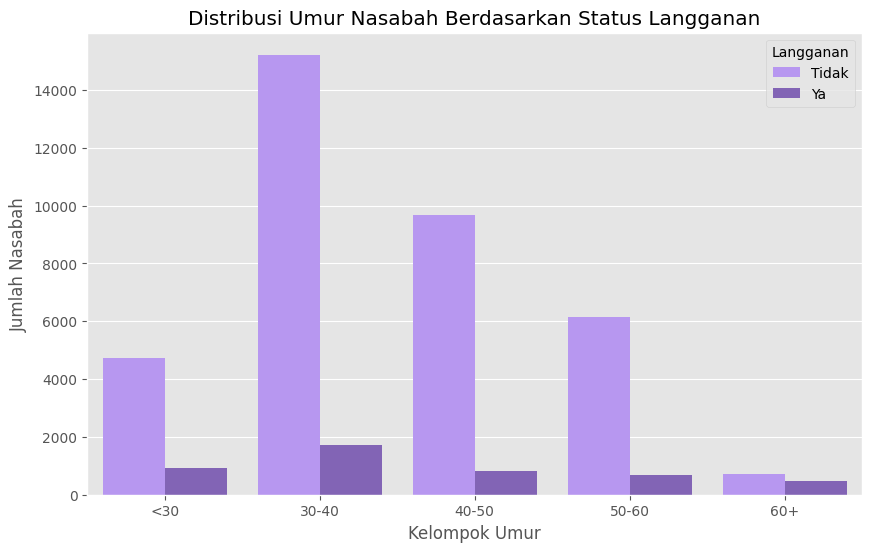

In [ ]:
# Visualisasi Distribusi Umur terhadap Status Langganan

# Membuat kelompok umur (binning) agar lebih mudah dibaca di grafik
bins = [18, 30, 40, 50, 60, 100]          # rentang umur
labels = ['<30', '30-40', '40-50', '50-60', '60+']  # label tiap kelompok
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

# Membuat grafik batang dengan seaborn
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='age_group', hue='deposit', palette=['#B388FF', '#7E57C2'])

# Menambahkan judul dan label
plt.title('Distribusi Umur Nasabah Berdasarkan Status Langganan')
plt.xlabel('Kelompok Umur')
plt.ylabel('Jumlah Nasabah')
plt.legend(title='Langganan', labels=['Tidak', 'Ya'])
plt.show()

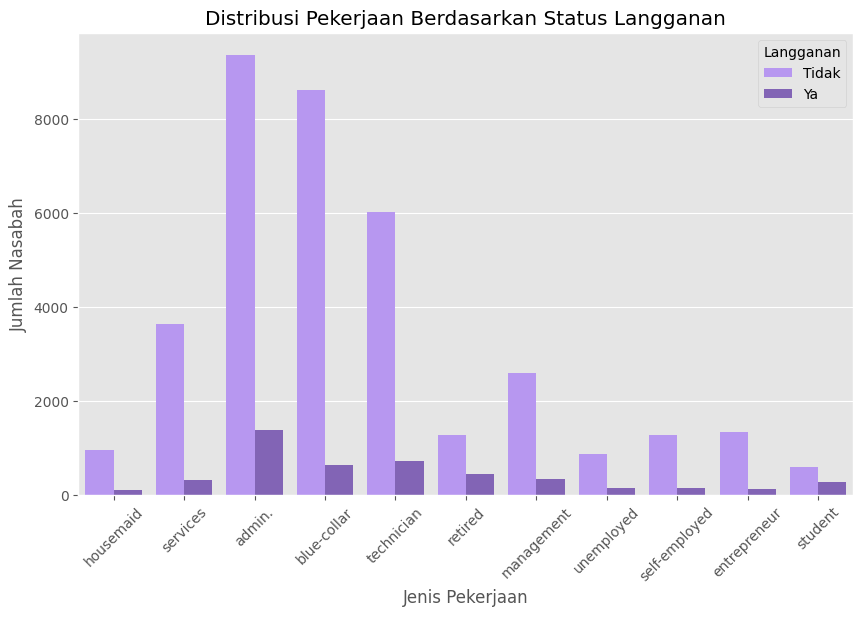

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='job', hue='deposit', palette=['#B388FF', '#7E57C2'])
plt.title('Distribusi Pekerjaan Berdasarkan Status Langganan')
plt.xlabel('Jenis Pekerjaan')
plt.ylabel('Jumlah Nasabah')
plt.xticks(rotation=45)
plt.legend(title='Langganan', labels=['Tidak', 'Ya'])
plt.show()

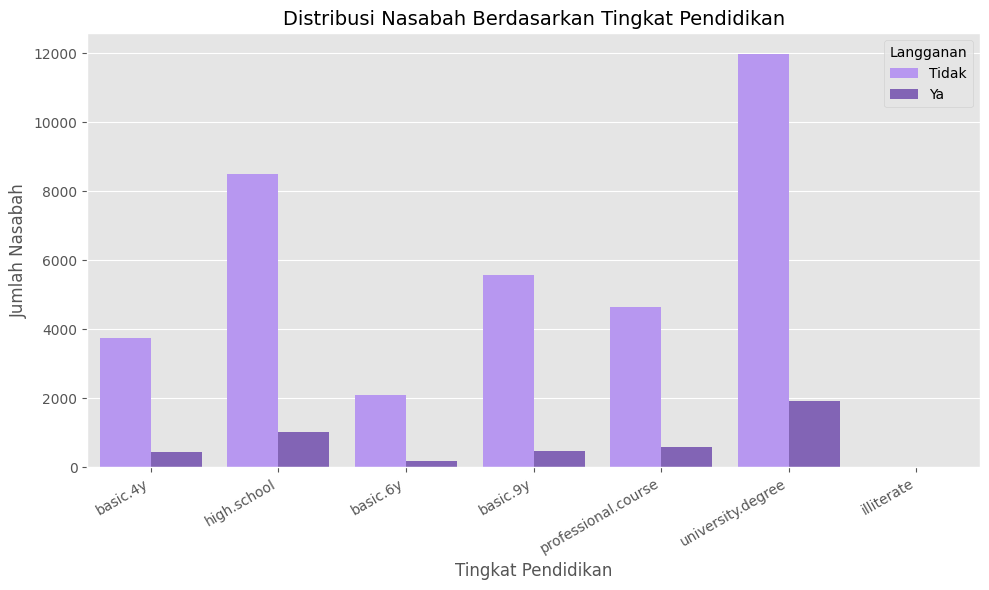

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='education', hue='deposit', palette=['#B388FF', '#7E57C2'])

# Judul dan label
plt.title('Distribusi Nasabah Berdasarkan Tingkat Pendidikan', fontsize=14)
plt.xlabel('Tingkat Pendidikan', fontsize=12)
plt.ylabel('Jumlah Nasabah', fontsize=12)
plt.legend(title='Langganan', labels=['Tidak', 'Ya'], fontsize=10)

# Rotasi dan perapian label X biar gak nabrak
plt.xticks(rotation=30, ha='right', fontsize=10)

# Tambah jarak biar tulisan nggak kepotong
plt.tight_layout()

plt.show()

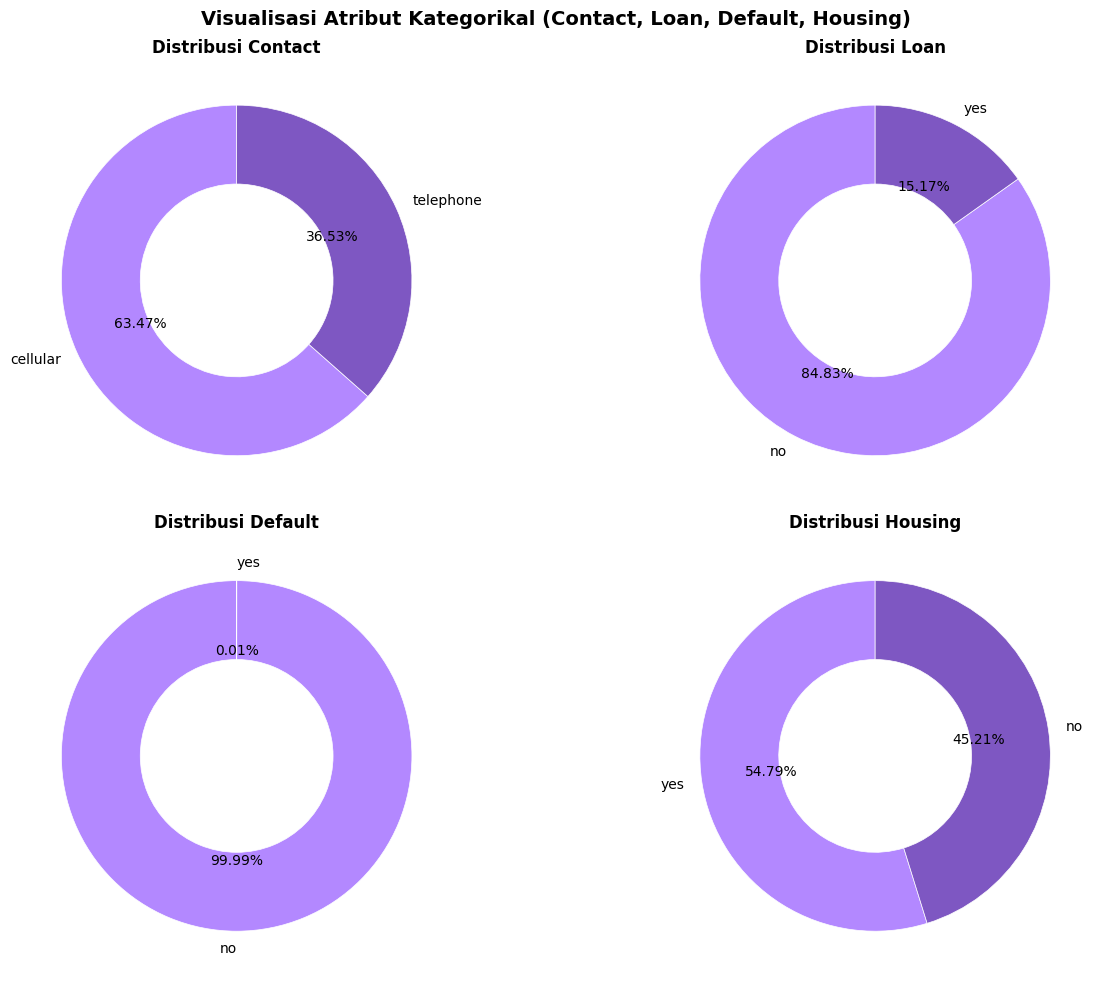

In [ ]:
# Membuat daftar kolom kategorik yang ingin divisualisasikan
cols = ['contact', 'loan', 'default', 'housing']

# Menentukan jumlah subplot
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Warna tema ungu biar selaras dengan grafik sebelumnya
colors = ['#B388FF', '#7E57C2', '#D1C4E9']

# Loop untuk membuat donut chart setiap atribut
for i, col in enumerate(cols):
    ax = axes[i//2, i%2]
    counts = df[col].value_counts()
    labels = counts.index
    sizes = counts.values

    # Membuat Pie Chart
    wedges, texts, autotexts = ax.pie(
        sizes,
        labels=labels,
        autopct='%.2f%%',
        startangle=90,
        colors=colors,
        wedgeprops={'width': 0.45, 'edgecolor': 'w'},
        textprops={'fontsize': 10}
    )

    # Menambahkan judul di atas tiap chart
    ax.set_title(f'Distribusi {col.capitalize()}', fontsize=12, fontweight='bold')

# Mengatur jarak antar plot
plt.suptitle('Visualisasi Atribut Kategorikal (Contact, Loan, Default, Housing)', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

/tmp/ipython-input-2409470695.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='deposit', y='duration', palette=['#B388FF', '#7E57C2'])


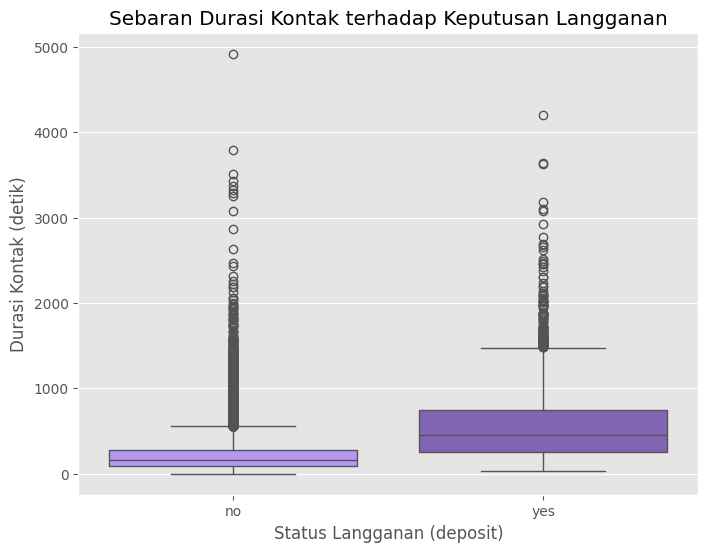

In [ ]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df, x='deposit', y='duration', palette=['#B388FF', '#7E57C2'])
plt.title('Sebaran Durasi Kontak terhadap Keputusan Langganan')
plt.xlabel('Status Langganan (deposit)')
plt.ylabel('Durasi Kontak (detik)')
plt.show()

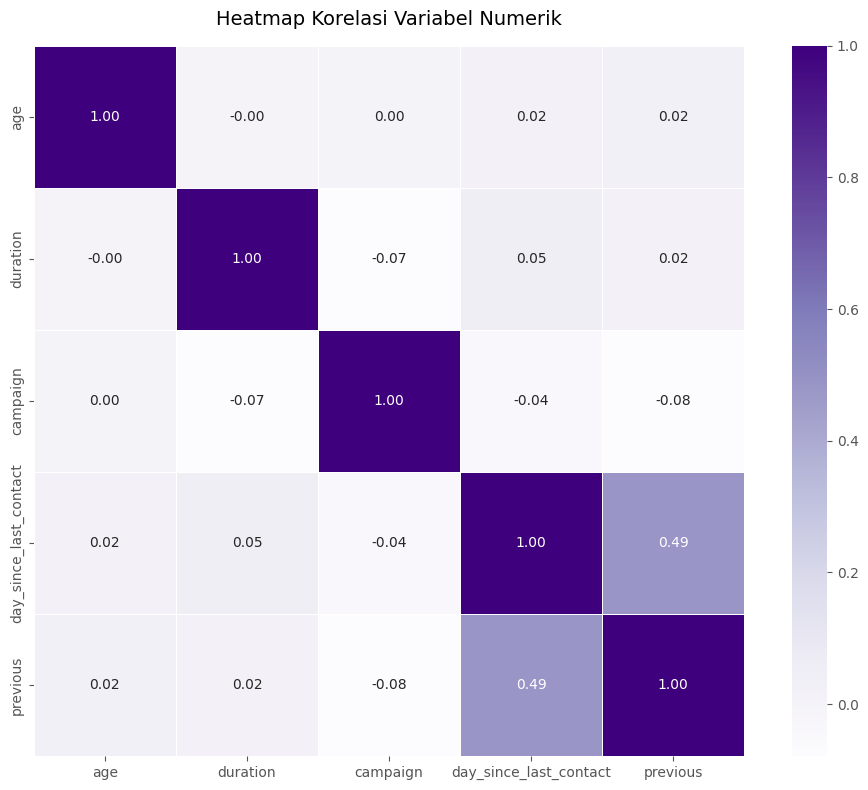

In [ ]:
# Membuat matriks korelasi hanya untuk kolom numerik
kolom_numerik = list(df.select_dtypes(include=['int64']).columns.values)
corr = df[kolom_numerik].corr()

# Ukuran figure biar jelas
plt.figure(figsize=(10,8))

# Membuat heatmap dengan seaborn
sns.heatmap(
    corr,
    annot=True,              # Menampilkan nilai korelasi di tiap kotak
    fmt=".2f",               # Format angka 2 desimal
    cmap='Purples',          # Palet warna ungu
    linewidths=0.5,          # Jarak antar sel biar rapi
    square=True              # Sel berbentuk kotak
)

# Menambahkan judul dan memperbesar ukuran font
plt.title('Heatmap Korelasi Variabel Numerik', fontsize=14, pad=15)
plt.tight_layout()
plt.show()

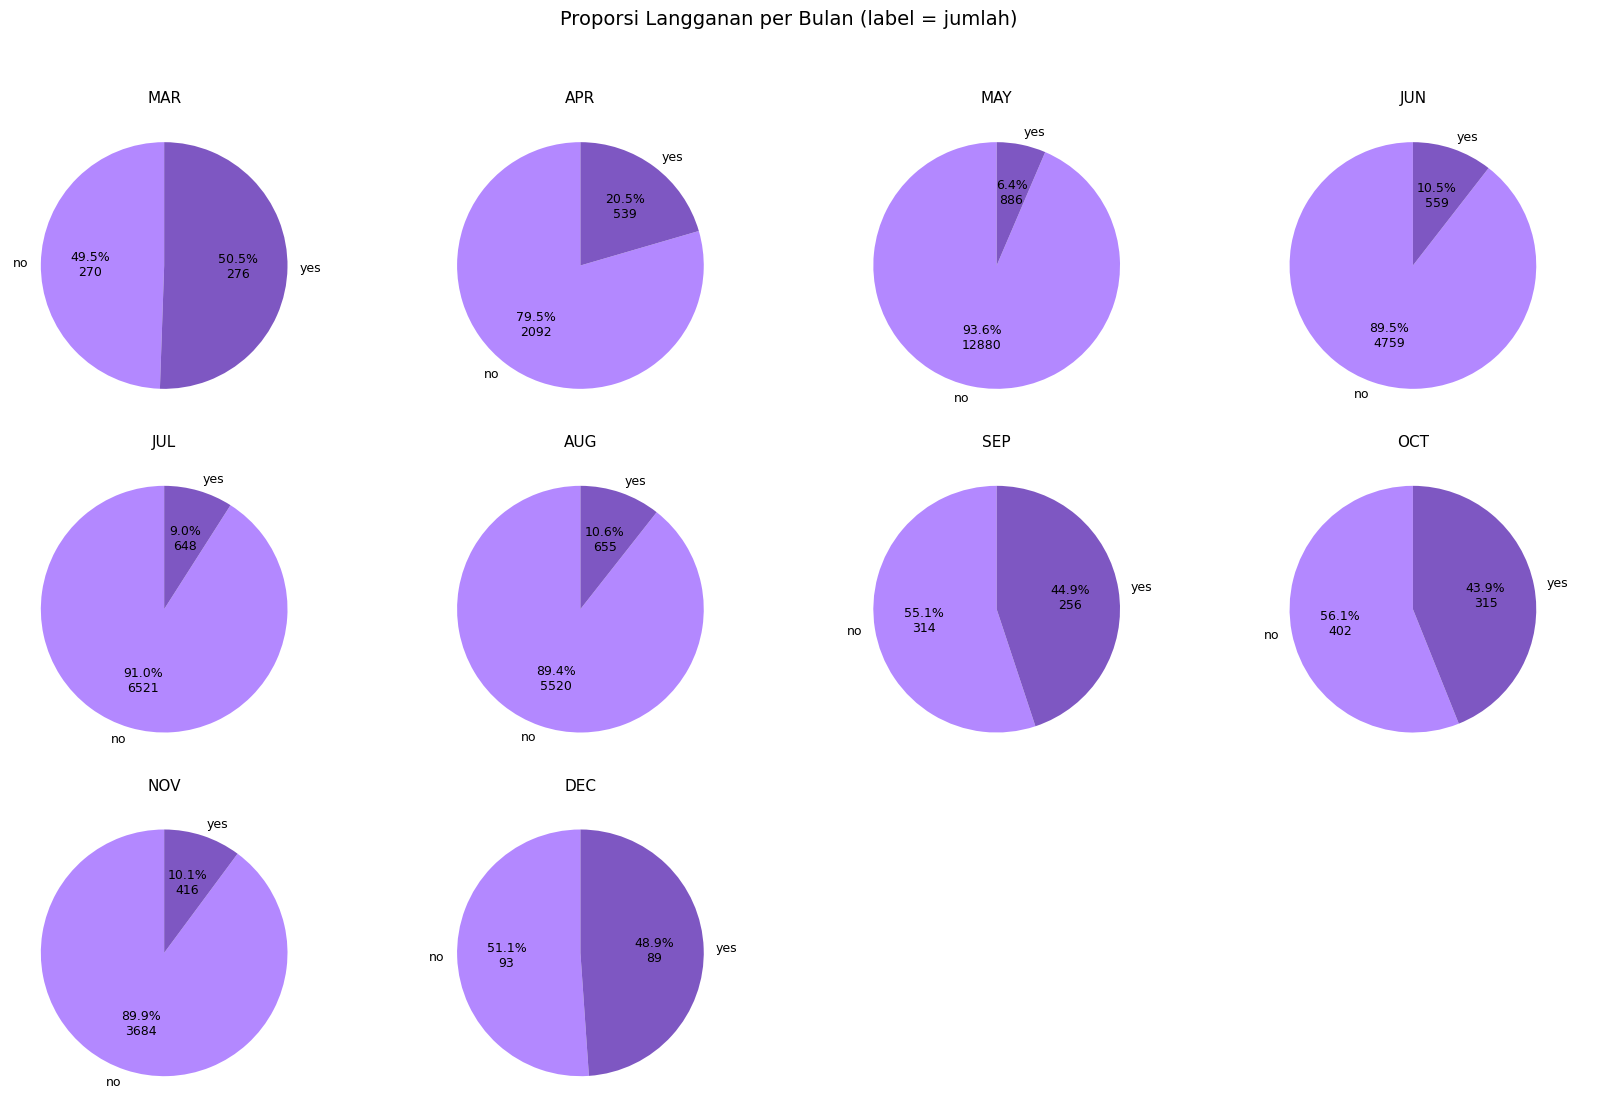

In [ ]:
# urutan bulan standar, ambil yang memang ada di dataset
bulan_urut = ['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec']
bulan_tersedia = [m for m in bulan_urut if m in df['month'].unique()]

# grid dinamis (maks 4 kolom biar rapi)
cols = min(4, len(bulan_tersedia))
rows = math.ceil(len(bulan_tersedia) / cols)

fig, axes = plt.subplots(rows, cols, figsize=(4.2*cols, 3.6*rows))
axes = np.array(axes).reshape(-1)
colors = ['#B388FF', '#7E57C2']     # no, yes (ungu muda & tua)

def absolute_value(val, total):
    # mengubah persen → jumlah absolut
    return f"{round(val*total/100):.0f}"

for i, month in enumerate(bulan_tersedia):
    ax = axes[i]
    # urutkan no/yes agar konsisten warnanya
    vc = df.loc[df['month']==month, 'deposit'].value_counts().reindex(['no','yes']).fillna(0).astype(int)
    total = vc.sum()

    wedges, texts, autotexts = ax.pie(
        vc.values,
        labels=vc.index,
        autopct=lambda v: f"{v:.1f}%\n{absolute_value(v, total)}",
        startangle=90,
        colors=colors,
        textprops={'fontsize': 9}
    )
    ax.set_title(month.upper(), fontsize=11)

# jika grid lebih besar dari jumlah bulan, sembunyikan sisa axes
for j in range(i+1, rows*cols):
    axes[j].axis('off')

plt.suptitle('Proporsi Langganan per Bulan (label = jumlah)', fontsize=14, y=1.03)
plt.tight_layout()
plt.show()

## Pemodelan

In [ ]:
df_preparation = df.copy()
df_preparation.drop(columns=['age_group'], inplace=True)
column_deposit = df_preparation.columns.tolist()
column_deposit.remove('deposit')
column_deposit.append('deposit')
df_preparation = df_preparation[column_deposit]
df_preparation.head()

,age,job,marital,education,default,housing,loan,contact,month,day,...,duration,campaign,day_since_last_contact,previous,employment_variation_rate,consumer_price_index,consumer_confidence_index,euribor_3m_rate,number_of_employees,deposit
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,261,1,0,0,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,no,no,no,telephone,may,mon,...,149,1,0,0,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,226,1,0,0,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,151,1,0,0,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,307,1,0,0,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
# StandarScaler fitur numerik
numeric_features = ['age',
                    'duration',
                    'campaign',
                    'day_since_last_contact',
                    'previous',
                    'consumer_confidence_index',
                    'employment_variation_rate',
                    'consumer_price_index',
                    'euribor_3m_rate',
                    'number_of_employees']
df_preparation[numeric_features] = StandardScaler().fit_transform(df_preparation[numeric_features])
df_preparation.head()

,age,job,marital,education,default,housing,loan,contact,month,day,...,duration,campaign,day_since_last_contact,previous,employment_variation_rate,consumer_price_index,consumer_confidence_index,euribor_3m_rate,number_of_employees,deposit
0,1.533179,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,0.010321,-0.565981,-0.164041,-0.349561,0.64813,0.722627,0.886609,0.712491,0.331719,no
1,1.629144,services,married,high.school,no,no,no,telephone,may,mon,...,-0.421601,-0.565981,-0.164041,-0.349561,0.64813,0.722627,0.886609,0.712491,0.331719,no
2,-0.290159,services,married,high.school,no,yes,no,telephone,may,mon,...,-0.124654,-0.565981,-0.164041,-0.349561,0.64813,0.722627,0.886609,0.712491,0.331719,no
3,-0.002263,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,-0.413888,-0.565981,-0.164041,-0.349561,0.64813,0.722627,0.886609,0.712491,0.331719,no
4,1.533179,services,married,high.school,no,no,yes,telephone,may,mon,...,0.187718,-0.565981,-0.164041,-0.349561,0.64813,0.722627,0.886609,0.712491,0.331719,no


In [ ]:
# encoding fitur kategori
encoded_data = LabelEncoder()
df_preparation['job'] = encoded_data.fit_transform(df_preparation['job'])
df_preparation['marital'] = encoded_data.fit_transform(df_preparation['marital'])
df_preparation['education'] = encoded_data.fit_transform(df_preparation['education'])
df_preparation['default'] = encoded_data.fit_transform(df_preparation['default'])
df_preparation['housing'] = encoded_data.fit_transform(df_preparation['housing'])
df_preparation['loan'] = encoded_data.fit_transform(df_preparation['loan'])
df_preparation['contact'] = encoded_data.fit_transform(df_preparation['contact'])
df_preparation['day'] = encoded_data.fit_transform(df_preparation['day'])
df_preparation['month'] = encoded_data.fit_transform(df_preparation['month'])
df_preparation['poutcome'] = encoded_data.fit_transform(df_preparation['poutcome'])

df_preparation['deposit'] = df_preparation['deposit'].replace({'yes': 1, 'no': 0}).astype(int)
df_preparation.head()



/tmp/ipython-input-1038618867.py:14: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_preparation['deposit'] = df_preparation['deposit'].replace({'yes': 1, 'no': 0}).astype(int)


,age,job,marital,education,default,housing,loan,contact,month,day,...,duration,campaign,day_since_last_contact,previous,employment_variation_rate,consumer_price_index,consumer_confidence_index,euribor_3m_rate,number_of_employees,deposit
0,1.533179,3,1,0,0,0,0,1,6,1,...,0.010321,-0.565981,-0.164041,-0.349561,0.64813,0.722627,0.886609,0.712491,0.331719,0
1,1.629144,7,1,3,0,0,0,1,6,1,...,-0.421601,-0.565981,-0.164041,-0.349561,0.64813,0.722627,0.886609,0.712491,0.331719,0
2,-0.290159,7,1,3,0,1,0,1,6,1,...,-0.124654,-0.565981,-0.164041,-0.349561,0.64813,0.722627,0.886609,0.712491,0.331719,0
3,-0.002263,0,1,1,0,0,0,1,6,1,...,-0.413888,-0.565981,-0.164041,-0.349561,0.64813,0.722627,0.886609,0.712491,0.331719,0
4,1.533179,7,1,3,0,0,1,1,6,1,...,0.187718,-0.565981,-0.164041,-0.349561,0.64813,0.722627,0.886609,0.712491,0.331719,0


In [ ]:
df_preparation.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41174 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        41174 non-null  float64
 1   job                        41174 non-null  int64  
 2   marital                    41174 non-null  int64  
 3   education                  41174 non-null  int64  
 4   default                    41174 non-null  int64  
 5   housing                    41174 non-null  int64  
 6   loan                       41174 non-null  int64  
 7   contact                    41174 non-null  int64  
 8   month                      41174 non-null  int64  
 9   day                        41174 non-null  int64  
 10  poutcome                   41174 non-null  int64  
 11  duration                   41174 non-null  float64
 12  campaign                   41174 non-null  float64
 13  day_since_last_contact     41174 non-null  float64


In [ ]:
# Memilih dan memisahkan feature & target
df_splitting = df_preparation.copy()
x = df_splitting.drop('deposit', axis=1)
y = df_splitting['deposit']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
print('Ukuran training feature:', X_train.shape)
print('Ukuran training target:', y_train.shape)
print('Ukuran testing feature:', X_test.shape)
print('Ukuran testing target:', y_test.shape)

Ukuran training feature: (32939, 20)
Ukuran training target: (32939,)
Ukuran testing feature: (8235, 20)
Ukuran testing target: (8235,)


In [83]:
from google.colab import files

# Simpan ke CSV
X_train.to_csv("X_train.csv", index=False)
X_test.to_csv("X_test.csv", index=False)
y_train.to_csv("y_train.csv", index=False)
y_test.to_csv("y_test.csv", index=False)

# Download semua
files.download("X_train.csv")
files.download("X_test.csv")
files.download("y_train.csv")
files.download("y_test.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Balancing data dengan SMOTE
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)
print('Ukuran training feature setelah balancing:', X_train.shape)
print('Ukuran training target setelah balancing:', y_train.shape)

Ukuran training feature setelah balancing: (58508, 20)
Ukuran training target setelah balancing: (58508,)


## Model Data

Akurasi Training Logistic Regression: 0.8797942161755657
Akurasi Testing Logistic Regression: 0.8571948998178507

Classification Report (Testing Data):
              precision    recall  f1-score   support

           0       0.97      0.86      0.91      7281
           1       0.44      0.82      0.57       954

    accuracy                           0.86      8235
   macro avg       0.71      0.84      0.74      8235
weighted avg       0.91      0.86      0.87      8235



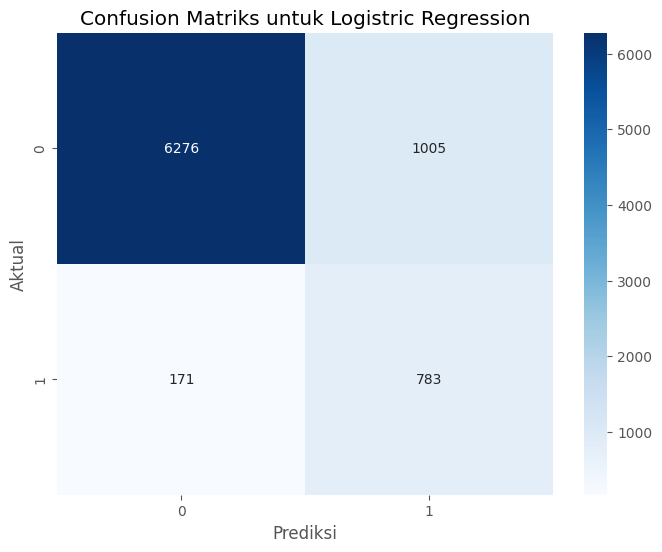

In [ ]:
# Logistic Regression Model
model_logistic = LogisticRegression(max_iter=1000, solver='liblinear')
model_logistic.fit(X_train, y_train)

y_train_pred_logistic = model_logistic.predict(X_train)
accuracy_train_logistic = accuracy_score(y_train, y_train_pred_logistic)

y_pred_logistic = model_logistic.predict(X_test)
accuracy_test_logistic = accuracy_score(y_test, y_pred_logistic)

print('Akurasi Training Logistic Regression:', accuracy_train_logistic)
print('Akurasi Testing Logistic Regression:', accuracy_test_logistic)
print('\nClassification Report (Testing Data):')
print(classification_report(y_test, y_pred_logistic))

# Visualisasi
cm = confusion_matrix(y_test, y_pred_logistic)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=model_logistic.classes_,
            yticklabels=model_logistic.classes_)
plt.title('Confusion Matriks untuk Logistric Regression')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.show()

Akurasi Training K-Nearest Neighbors: 0.9437512818759828
Akurasi Testing K-Nearest Neighbors: 0.847237401335762

Classification Report (Testing Data):
              precision    recall  f1-score   support

           0       0.96      0.86      0.91      7281
           1       0.41      0.76      0.54       954

    accuracy                           0.85      8235
   macro avg       0.69      0.81      0.72      8235
weighted avg       0.90      0.85      0.87      8235



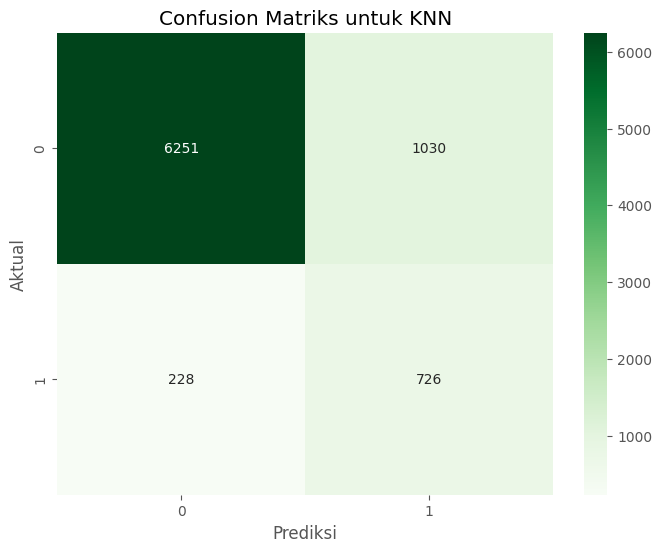

In [ ]:
# knn model
model_knn = KNeighborsClassifier(n_neighbors=5)
model_knn.fit(X_train, y_train)

y_train_pred_knn = model_knn.predict(X_train)
accuracy_train_knn = accuracy_score(y_train, y_train_pred_knn)

y_pred_knn = model_knn.predict(X_test)
accuracy_test_knn = accuracy_score(y_test, y_pred_knn)

print('Akurasi Training K-Nearest Neighbors:', accuracy_train_knn)
print('Akurasi Testing K-Nearest Neighbors:', accuracy_test_knn)
print('\nClassification Report (Testing Data):')
print(classification_report(y_test, y_pred_knn))

# Visualisasi
cm = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens',
            xticklabels=model_knn.classes_,
            yticklabels=model_knn.classes_)
plt.title('Confusion Matriks untuk KNN')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.show()

Akurasi Training Support Vector Machine: 0.9022185000341834
Akurasi Testing Support Vector Machine: 0.8523375834851245

Classification Report (Testing Data):
              precision    recall  f1-score   support

           0       0.98      0.85      0.91      7281
           1       0.43      0.86      0.58       954

    accuracy                           0.85      8235
   macro avg       0.71      0.86      0.74      8235
weighted avg       0.92      0.85      0.87      8235



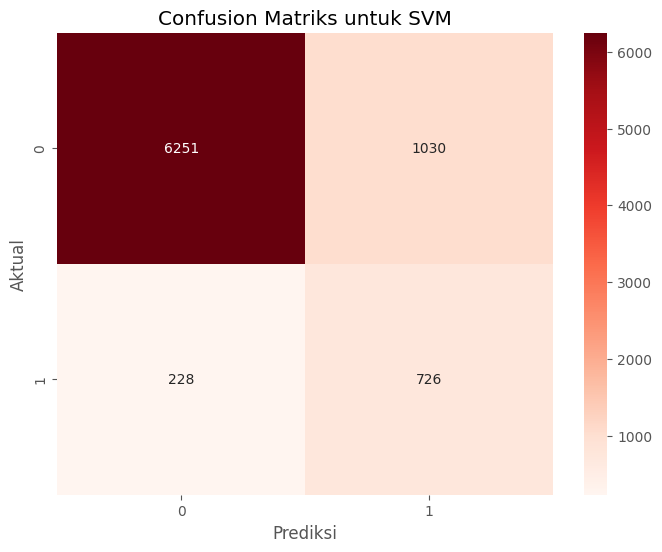

In [ ]:
# SVM Model
model_svm = svm.SVC()
model_svm.fit(X_train, y_train)

y_train_pred_svm = model_svm.predict(X_train)
accuracy_train_svm = accuracy_score(y_train, y_train_pred_svm)

y_pred_svm = model_svm.predict(X_test)
accuracy_test_svm = accuracy_score(y_test, y_pred_svm)

print('Akurasi Training Support Vector Machine:', accuracy_train_svm)
print('Akurasi Testing Support Vector Machine:', accuracy_test_svm)
print('\nClassification Report (Testing Data):')
print(classification_report(y_test, y_pred_svm))

# Visualisasi
cm = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds',
            xticklabels=model_knn.classes_,
            yticklabels=model_knn.classes_)
plt.title('Confusion Matriks untuk SVM')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.show()

Akurasi Training Decision Tree: 1.0
Akurasi Testing Decision Tree: 0.8795385549483911

Classification Report (Testing Data):
              precision    recall  f1-score   support

           0       0.94      0.92      0.93      7281
           1       0.48      0.58      0.53       954

    accuracy                           0.88      8235
   macro avg       0.71      0.75      0.73      8235
weighted avg       0.89      0.88      0.88      8235



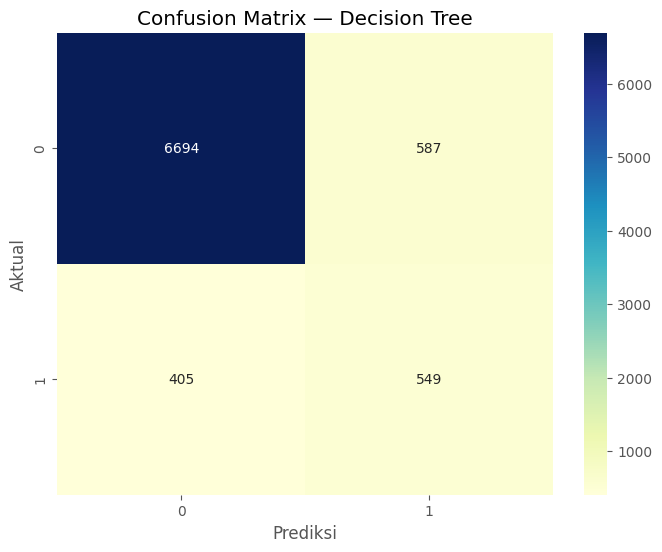

In [ ]:
# Decision Tree
model_tree = DecisionTreeClassifier(random_state=42)
model_tree.fit(X_train, y_train)

# Prediksi data training dan testing
y_train_pred_tree = model_tree.predict(X_train)
y_pred_tree = model_tree.predict(X_test)

# Hitung akurasi
accuracy_train_tree = accuracy_score(y_train, y_train_pred_tree)
accuracy_test_tree = accuracy_score(y_test, y_pred_tree)

# Cetak hasil seperti format Logistic Regression
print('Akurasi Training Decision Tree:', accuracy_train_tree)
print('Akurasi Testing Decision Tree:', accuracy_test_tree)
print('\nClassification Report (Testing Data):')
print(classification_report(y_test, y_pred_tree))

# Visualisasi
cm_tree = confusion_matrix(y_test, y_pred_tree)
plt.figure(figsize=(8,6))
sns.heatmap(cm_tree, annot=True, fmt='d', cmap='YlGnBu',
            xticklabels=model_tree.classes_,
            yticklabels=model_tree.classes_)
plt.title('Confusion Matrix — Decision Tree')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.show()

Akurasi Training Random Forest: 1.0
Akurasi Testing Random Forest: 0.8994535519125683

Classification Report (Testing Data):
              precision    recall  f1-score   support

           0       0.96      0.93      0.94      7281
           1       0.55      0.69      0.61       954

    accuracy                           0.90      8235
   macro avg       0.76      0.81      0.78      8235
weighted avg       0.91      0.90      0.90      8235



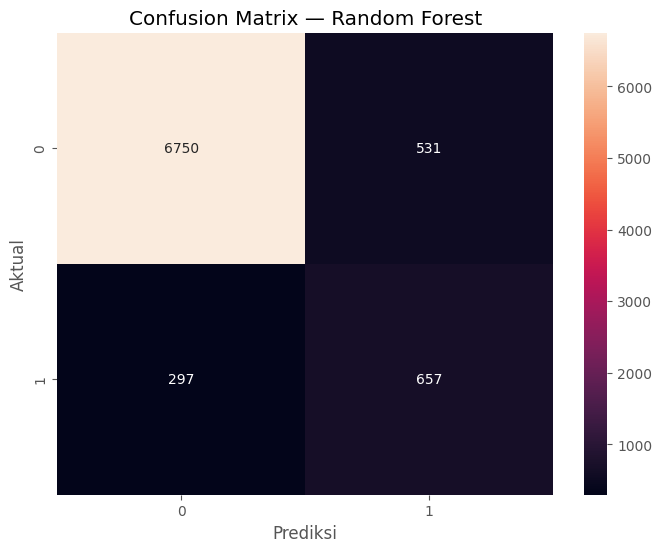

In [ ]:
# Membuat model Random Forest
model_rf = RandomForestClassifier(
    n_estimators=100,          # jumlah pohon
    max_depth=None,            # tidak dibatasi (bisa diatur misal 10–20 biar tidak overfit)
    random_state=42,
    n_jobs=-1                  # pakai semua core CPU agar cepat
)
model_rf.fit(X_train, y_train)

# Prediksi data training dan testing
y_train_pred_rf = model_rf.predict(X_train)
y_pred_rf = model_rf.predict(X_test)

# Hitung akurasi
accuracy_train_rf = accuracy_score(y_train, y_train_pred_rf)
accuracy_test_rf = accuracy_score(y_test, y_pred_rf)

# Cetak hasil seperti format sebelumnya
print('Akurasi Training Random Forest:', accuracy_train_rf)
print('Akurasi Testing Random Forest:', accuracy_test_rf)
print('\nClassification Report (Testing Data):')
print(classification_report(y_test, y_pred_rf))

# Visualisasi
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8,6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='rocket',
            xticklabels=model_rf.classes_,
            yticklabels=model_rf.classes_)
plt.title('Confusion Matrix — Random Forest')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.show()

Akurasi Training Naive Bayes: 0.7814145074177891
Akurasi Testing Naive Bayes : 0.6807528840315725

Classification Report (Testing Data):
              precision    recall  f1-score   support

           0       0.97      0.66      0.78      7281
           1       0.25      0.86      0.38       954

    accuracy                           0.68      8235
   macro avg       0.61      0.76      0.58      8235
weighted avg       0.89      0.68      0.74      8235



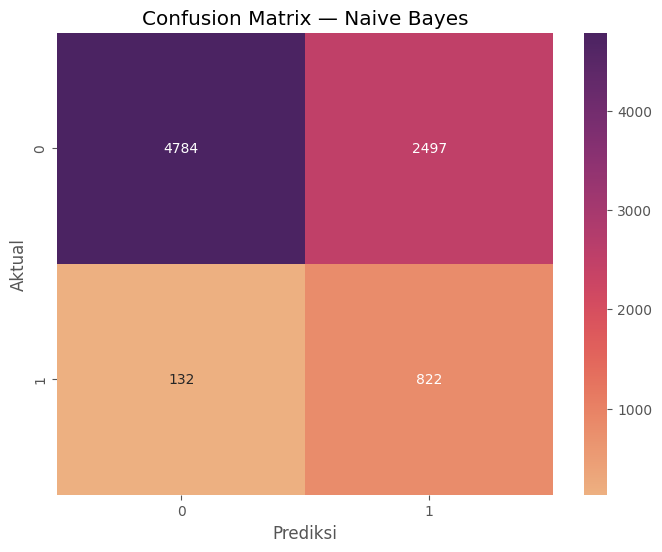

In [ ]:
# Naive Bayes
model_nb = GaussianNB()
model_nb.fit(X_train, y_train)

y_train_pred_nb = model_nb.predict(X_train)
y_pred_nb = model_nb.predict(X_test)

print('Akurasi Training Naive Bayes:', accuracy_score(y_train, y_train_pred_nb))
print('Akurasi Testing Naive Bayes :', accuracy_score(y_test, y_pred_nb))
print('\nClassification Report (Testing Data):')
print(classification_report(y_test, y_pred_nb))

# Visualisasi
cm_nb = confusion_matrix(y_test, y_pred_nb)
plt.figure(figsize=(8,6))
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='flare',
            xticklabels=model_nb.classes_,
            yticklabels=model_nb.classes_)
plt.title('Confusion Matrix — Naive Bayes')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.show()

Akurasi Training XGBoost: 0.9694571682504957
Akurasi Testing XGBoost : 0.908682452944748

Classification Report (Testing Data):
              precision    recall  f1-score   support

          no       0.96      0.94      0.95      7281
         yes       0.59      0.68      0.63       954

    accuracy                           0.91      8235
   macro avg       0.77      0.81      0.79      8235
weighted avg       0.91      0.91      0.91      8235



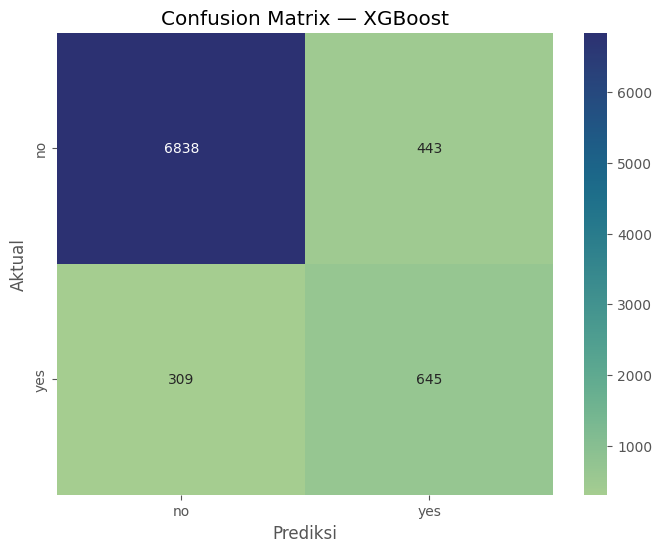

In [ ]:
# XGBoost
model_xgb = XGBClassifier(
    random_state=42,
    eval_metric='logloss',
    n_jobs=-1,
    objective='binary:logistic'
)

# y_train & y_test
model_xgb.fit(X_train, y_train)

# prediksi
y_train_pred_xgb = model_xgb.predict(X_train)
y_pred_xgb = model_xgb.predict(X_test)

# akurasi & report
print('Akurasi Training XGBoost:', accuracy_score(y_train, y_train_pred_xgb))
print('Akurasi Testing XGBoost :', accuracy_score(y_test, y_pred_xgb))
print('\nClassification Report (Testing Data):')
print(classification_report(
    y_test,
    y_pred_xgb,
    labels=[0,1],
    target_names=['no', 'yes']
))

# Visualisasi Confusion Matrix
cm_xgb = confusion_matrix(y_test, y_pred_xgb, labels=[0,1])
plt.figure(figsize=(8,6))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='crest',
            xticklabels=['no','yes'],
            yticklabels=['no','yes'])
plt.title('Confusion Matrix — XGBoost')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.show()

In [ ]:
# Analisis keseluruhan model
models={
    'Logistic Regression':model_logistic,
    'KNN':model_knn,
    'SVM':model_svm,
    'Decision Tree':model_tree,
    'Random Forest':model_rf,
    'Naive Bayes':model_nb,
    'XGBoost':model_xgb,
}
for name, model in models.items():
    # Lakukan prediksi pada data testing
    y_pred = model.predict(X_test)

    # Hitung akurasi menggunakan target yang sudah di-encode
    accuracy = accuracy_score(y_test, y_pred)

    # Tampilkan hasil
    print(f'- {name}: Akurasi Testing = {accuracy:.4f}')

- Logistic Regression: Akurasi Testing = 0.8572
- KNN: Akurasi Testing = 0.8472
- SVM: Akurasi Testing = 0.8523
- Decision Tree: Akurasi Testing = 0.8795
- Random Forest: Akurasi Testing = 0.8995
- Naive Bayes: Akurasi Testing = 0.6808
- XGBoost: Akurasi Testing = 0.9087


## ANN Model (Deep Learning)

In [ ]:
# Cek jumlah fitur input
input_dim = X_train.shape[1]
print("Input dim ANN:", input_dim)

# Membangun arsitektur ANN
classifier = Sequential()
classifier.add(Dense(units=13,
                     activation='relu',
                     kernel_initializer='uniform',
                     input_dim=input_dim))
classifier.add(Dropout(rate=0.1))

classifier.add(Dense(units=13,
                     activation='relu',
                     kernel_initializer='uniform'))
classifier.add(Dropout(rate=0.1))

classifier.add(Dense(units=1,
                     activation='sigmoid',
                     kernel_initializer='uniform'))

# Compile ANN
classifier.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Training ANN
start = time()
history_ann = classifier.fit(
    x=X_train,
    y=y_train,
    batch_size=10,
    epochs=100,
    verbose=1
)
end = time()
print(f"Waktu Training ANN: {round(end - start, 2)} detik")

# Prediksi probabilitas
y_train_proba_ann = classifier.predict(X_train)
y_test_proba_ann  = classifier.predict(X_test)

# Konversi ke kelas (0/1) dengan threshold 0.5
y_train_pred_ann = (y_train_proba_ann > 0.5).astype(int).ravel()
y_pred_ann       = (y_test_proba_ann  > 0.5).astype(int).ravel()

# Hitung akurasi training & testing (format sama dengan algoritma lain)
accuracy_train_ann = accuracy_score(y_train, y_train_pred_ann)
accuracy_test_ann  = accuracy_score(y_test, y_pred_ann)

print('Akurasi Training Artificial Neural Network (ANN):', accuracy_train_ann)
print('Akurasi Testing Artificial Neural Network (ANN):', accuracy_test_ann)
print('\nClassification Report (Testing Data):')
print(classification_report(y_test, y_pred_ann))

Input dim ANN: 20
Epoch 1/100


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5851/5851 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - accuracy: 0.8470 - loss: 0.3711
Epoch 2/100
5851/5851 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - accuracy: 0.8815 - loss: 0.2936
Epoch 3/100
5851/5851 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - accuracy: 0.8855 - loss: 0.2819
Epoch 4/100
5851/5851 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - accuracy: 0.8875 - loss: 0.2753
Epoch 5/100
5851/5851 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - accuracy: 0.8900 - loss: 0.2671
Epoch 6/100
5851/5851 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - accuracy: 0.8912 - loss: 0.2667
Epoch 7/100
5851/5851 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - accuracy: 0.8910 - loss: 0.2651
Epoch 8/100
5851/5851 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - accuracy: 0.8962 - loss: 0.2607
Epoch 9/100
5851/5851 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - accuracy: 0.8959 - loss: 0.2592
Epoch 10/100
5851/5851 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - accuracy: 0.8933 - loss: 0.2635
Epoch 11/100
5851/5851 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step - accuracy: 0.8972 - loss: 0.2556
Epoch 12/100
5851/5851 ━━━━━━━

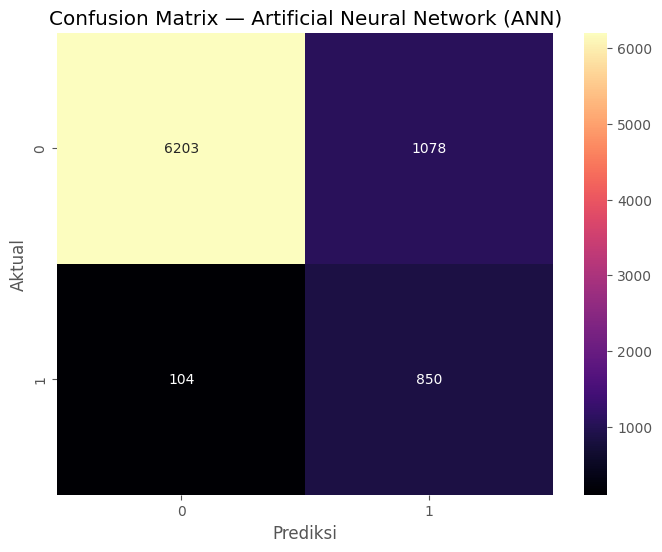

In [ ]:
# Confusion Matrix — ANN
cm_ann = confusion_matrix(y_test, y_pred_ann)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_ann, annot=True, fmt='d', cmap='magma',
            xticklabels=[0, 1],
            yticklabels=[0, 1])
plt.title('Confusion Matrix — Artificial Neural Network (ANN)')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.show()

## Hyperparameter Tuning Model

Fitting 5 folds for each of 60 candidates, totalling 300 fits


/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py:547: FitFailedWarning: 
50 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py", line 1172, in fit
    solver = _check_solve

Best Parameters: {'C': 100, 'class_weight': None, 'penalty': 'l2', 'solver': 'lbfgs'}
Best Cross-Validation Accuracy: 0.8785296665325836

Testing Accuracy: 0.8571948998178507

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.86      0.91      7281
           1       0.44      0.82      0.57       954

    accuracy                           0.86      8235
   macro avg       0.71      0.84      0.74      8235
weighted avg       0.91      0.86      0.87      8235



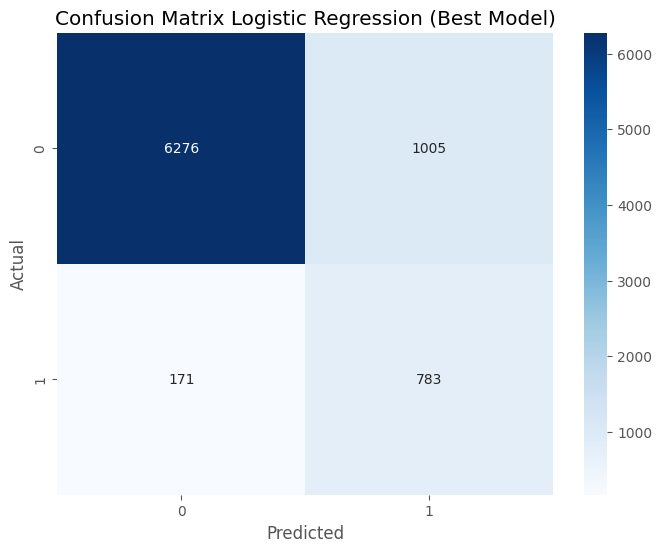

In [ ]:
# Hyperparameter Tuning - Logistic Regression
log_reg = LogisticRegression(max_iter=1000)

# Grid parameter
param_grid = [{
    'solver': ['liblinear', 'lbfgs', 'saga'],
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'class_weight': [None, 'balanced']
}]
grid_search = GridSearchCV(
    estimator=log_reg,
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,
    verbose=1,
    n_jobs=-1
)

grid_search.fit(X_train, y_train)
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

best_log_reg = grid_search.best_estimator_
y_pred_best = best_log_reg.predict(X_test)
print("\nTesting Accuracy:", accuracy_score(y_test, y_pred_best))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_best))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_best)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=best_log_reg.classes_,
            yticklabels=best_log_reg.classes_)
plt.title('Confusion Matrix Logistic Regression (Best Model)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Fitting 5 folds for each of 42 candidates, totalling 210 fits
Best Parameters: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}
Best Cross-Validation Accuracy: 0.9363847894011428

Testing Accuracy: 0.8571948998178507

Classification Report (Testing Data):
              precision    recall  f1-score   support

           0       0.95      0.89      0.92      7281
           1       0.42      0.63      0.51       954

    accuracy                           0.86      8235
   macro avg       0.69      0.76      0.71      8235
weighted avg       0.89      0.86      0.87      8235



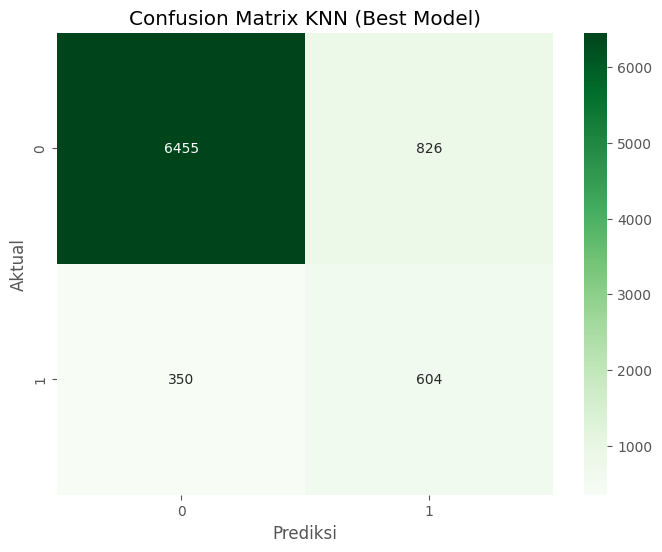

In [ ]:
# Hyperparameter Tuning - KNN
knn = KNeighborsClassifier()

# Grid hyperparameter
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11, 13, 15],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}
grid_search_knn = GridSearchCV(
    estimator=knn,
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,
    verbose=1,
    n_jobs=-1
)

grid_search_knn.fit(X_train, y_train)

print("Best Parameters:", grid_search_knn.best_params_)
print("Best Cross-Validation Accuracy:", grid_search_knn.best_score_)

best_knn = grid_search_knn.best_estimator_

y_pred_best_knn = best_knn.predict(X_test)

print("\nTesting Accuracy:", accuracy_score(y_test, y_pred_best_knn))
print("\nClassification Report (Testing Data):")
print(classification_report(y_test, y_pred_best_knn))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_best_knn)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens',
            xticklabels=best_knn.classes_,
            yticklabels=best_knn.classes_)
plt.title('Confusion Matrix KNN (Best Model)')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.show()

In [ ]:
'''
# Hyperparameter Tuning - SVM
svm_model = svm.SVC()

# Grid hyperparameter
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1]
}
grid_search_svm = GridSearchCV(
    estimator=svm_model,
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,
    verbose=1,
    n_jobs=-1
)

grid_search_svm.fit(X_train, y_train)

print("Best Parameters:", grid_search_svm.best_params_)
print("Best Cross-Validation Accuracy:", grid_search_svm.best_score_)

best_svm = grid_search_svm.best_estimator_

y_pred_best_svm = best_svm.predict(X_test)
accuracy_test_svm_best = accuracy_score(y_test, y_pred_best_svm)

print("\nTesting Accuracy (Best Model):", accuracy_test_svm_best)
print("\nClassification Report (Testing Data):")
print(classification_report(y_test, y_pred_best_svm))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_best_svm)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds',
            xticklabels=best_svm.classes_,
            yticklabels=best_svm.classes_)
plt.title('Confusion Matrix untuk SVM (Best Model)')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.show()
'''

'\n# Hyperparameter Tuning - SVM\nsvm_model = svm.SVC()\n\n# Grid hyperparameter\nparam_grid = {\n    \'C\': [0.1, 1, 10, 100],\n    \'kernel\': [\'linear\', \'rbf\', \'poly\'],\n    \'gamma\': [\'scale\', \'auto\', 0.001, 0.01, 0.1, 1]\n}\ngrid_search_svm = GridSearchCV(\n    estimator=svm_model,\n    param_grid=param_grid,\n    scoring=\'accuracy\',\n    cv=5,\n    verbose=1,\n    n_jobs=-1\n)\n\ngrid_search_svm.fit(X_train, y_train)\n\nprint("Best Parameters:", grid_search_svm.best_params_)\nprint("Best Cross-Validation Accuracy:", grid_search_svm.best_score_)\n\nbest_svm = grid_search_svm.best_estimator_\n\ny_pred_best_svm = best_svm.predict(X_test)\naccuracy_test_svm_best = accuracy_score(y_test, y_pred_best_svm)\n\nprint("\nTesting Accuracy (Best Model):", accuracy_test_svm_best)\nprint("\nClassification Report (Testing Data):")\nprint(classification_report(y_test, y_pred_best_svm))\n\n# Confusion Matrix\ncm = confusion_matrix(y_test, y_pred_best_svm)\nplt.figure(figsize=(8, 6))\

Fitting 5 folds for each of 1152 candidates, totalling 5760 fits
Best Parameters: {'criterion': 'gini', 'max_depth': 15, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Cross-Validation Accuracy: 0.91927648299287

Testing Accuracy (Best Model): 0.8790528233151184

Classification Report (Testing Data):
              precision    recall  f1-score   support

           0       0.95      0.91      0.93      7281
           1       0.48      0.65      0.55       954

    accuracy                           0.88      8235
   macro avg       0.72      0.78      0.74      8235
weighted avg       0.90      0.88      0.89      8235



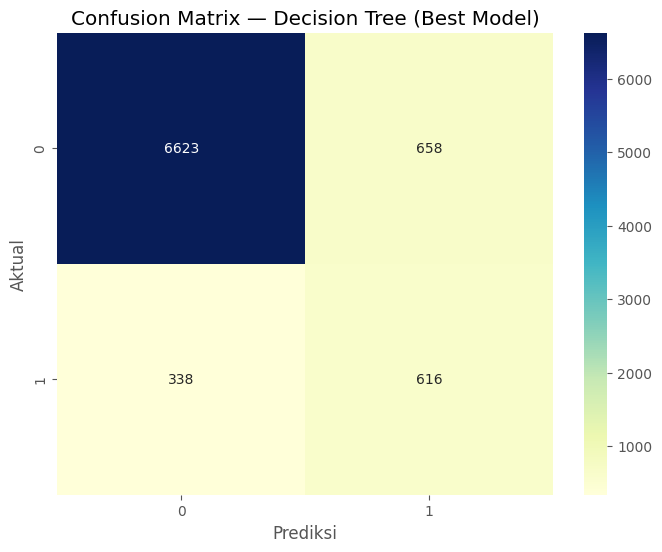

In [ ]:
# Hyperparameter Tuning - Decision Tree
tree_model = DecisionTreeClassifier(random_state=42)

# Grid parameter untuk tuning
param_grid = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': [None, 3, 5, 7, 9, 12, 15, 20],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 6],
    'max_features': [None, 'sqrt', 'log2']
}
grid_search_tree = GridSearchCV(
    estimator=tree_model,
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,
    n_jobs=-1,
    verbose=1
)

grid_search_tree.fit(X_train, y_train)

print("Best Parameters:", grid_search_tree.best_params_)
print("Best Cross-Validation Accuracy:", grid_search_tree.best_score_)

best_tree = grid_search_tree.best_estimator_

y_pred_best_tree = best_tree.predict(X_test)

print("\nTesting Accuracy (Best Model):", accuracy_score(y_test, y_pred_best_tree))
print("\nClassification Report (Testing Data):")
print(classification_report(y_test, y_pred_best_tree))

# Confusion Matrix
cm_best_tree = confusion_matrix(y_test, y_pred_best_tree)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_best_tree, annot=True, fmt='d', cmap='YlGnBu',
            xticklabels=best_tree.classes_,
            yticklabels=best_tree.classes_)
plt.title('Confusion Matrix — Decision Tree (Best Model)')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.show()

In [ ]:
'''
# Hyperparameter Tuning - Random Forest
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

# Grid hyperparameter
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False],
    'class_weight': [None, 'balanced']
}

grid_rf = GridSearchCV(
    estimator=rf,
    param_grid=param_grid_rf,
    scoring='accuracy',
    cv=5,
    verbose=1,
    n_jobs=-1
)

grid_rf.fit(X_train, y_train)
print("Best Parameters (Random Forest):", grid_rf.best_params_)
print("Best Cross-Validation Accuracy (Random Forest):", grid_rf.best_score_)

best_rf = grid_rf.best_estimator_
y_pred_best_rf = best_rf.predict(X_test)

print("\nTesting Accuracy (Random Forest):", accuracy_score(y_test, y_pred_best_rf))
print("\nClassification Report (Random Forest):")
print(classification_report(y_test, y_pred_best_rf))

# Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_best_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='rocket',
            xticklabels=best_rf.classes_,
            yticklabels=best_rf.classes_)
plt.title('Confusion Matrix Random Forest (Best Model)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
'''

'\n# Hyperparameter Tuning - Random Forest\nrf = RandomForestClassifier(random_state=42, n_jobs=-1)\n\n# Grid hyperparameter\nparam_grid_rf = {\n    \'n_estimators\': [100, 200, 300],\n    \'max_depth\': [None, 10, 20],\n    \'min_samples_split\': [2, 5, 10],\n    \'min_samples_leaf\': [1, 2, 4],\n    \'bootstrap\': [True, False],\n    \'class_weight\': [None, \'balanced\']\n}\n\ngrid_rf = GridSearchCV(\n    estimator=rf,\n    param_grid=param_grid_rf,\n    scoring=\'accuracy\',\n    cv=5,\n    verbose=1,\n    n_jobs=-1\n)\n\ngrid_rf.fit(X_train, y_train)\nprint("Best Parameters (Random Forest):", grid_rf.best_params_)\nprint("Best Cross-Validation Accuracy (Random Forest):", grid_rf.best_score_)\n\nbest_rf = grid_rf.best_estimator_\ny_pred_best_rf = best_rf.predict(X_test)\n\nprint("\nTesting Accuracy (Random Forest):", accuracy_score(y_test, y_pred_best_rf))\nprint("\nClassification Report (Random Forest):")\nprint(classification_report(y_test, y_pred_best_rf))\n\n# Confusion Matrix\

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best Parameters (Naive Bayes): {'var_smoothing': np.float64(1e-07)}
Best Cross-Validation Accuracy (Naive Bayes): 0.7818249118412195

Testing Accuracy (Naive Bayes): 0.7491196114146934

Classification Report (Naive Bayes):
              precision    recall  f1-score   support

           0       0.96      0.75      0.84      7281
           1       0.29      0.77      0.42       954

    accuracy                           0.75      8235
   macro avg       0.62      0.76      0.63      8235
weighted avg       0.88      0.75      0.79      8235



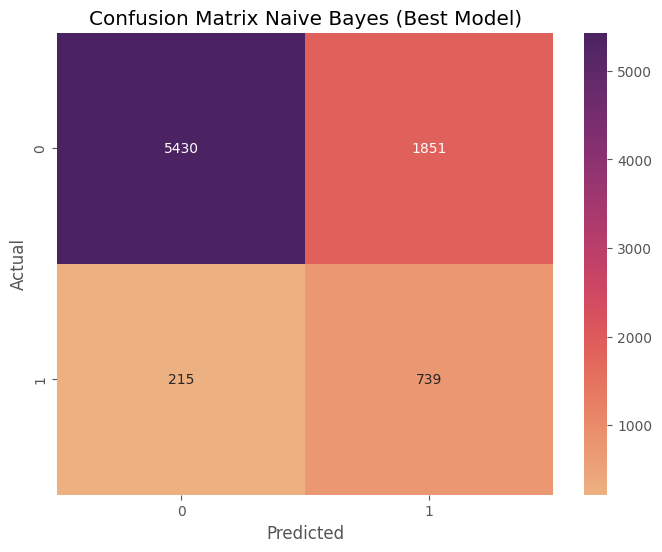

In [ ]:
# Hyperparameter Tuning - Naive Bayes
nb = GaussianNB()

# Grid hyperparameter
param_grid_nb = {
    'var_smoothing': np.logspace(-9, -1, 5)
}

grid_nb = GridSearchCV(
    estimator=nb,
    param_grid=param_grid_nb,
    scoring='accuracy',
    cv=5,
    verbose=1,
    n_jobs=-1
)

grid_nb.fit(X_train, y_train)
print("Best Parameters (Naive Bayes):", grid_nb.best_params_)
print("Best Cross-Validation Accuracy (Naive Bayes):", grid_nb.best_score_)

best_nb = grid_nb.best_estimator_
y_pred_best_nb = best_nb.predict(X_test)

print("\nTesting Accuracy (Naive Bayes):", accuracy_score(y_test, y_pred_best_nb))
print("\nClassification Report (Naive Bayes):")
print(classification_report(y_test, y_pred_best_nb))

# Confusion Matrix
cm_nb = confusion_matrix(y_test, y_pred_best_nb)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='flare',
            xticklabels=best_nb.classes_,
            yticklabels=best_nb.classes_)
plt.title('Confusion Matrix Naive Bayes (Best Model)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best Parameters (XGBoost): {'colsample_bytree': 1.0, 'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 200, 'scale_pos_weight': 1, 'subsample': 0.8}
Best Cross-Validation Accuracy (XGBoost): 0.9363173978135872

Testing Accuracy (XGBoost): 0.9088038858530662

Classification Report (XGBoost):
              precision    recall  f1-score   support

          no       0.95      0.95      0.95      7281
         yes       0.60      0.63      0.61       954

    accuracy                           0.91      8235
   macro avg       0.78      0.79      0.78      8235
weighted avg       0.91      0.91      0.91      8235



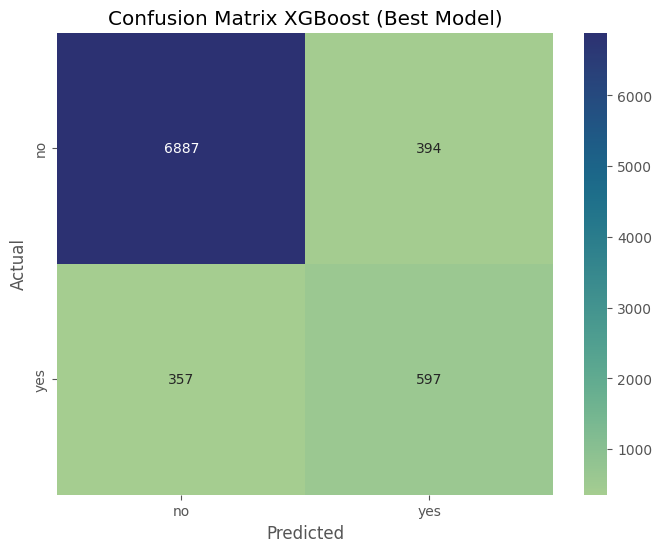

In [ ]:
# Hyperparameter Tuning - Xgboost
xgb = XGBClassifier(
    random_state=42,
    eval_metric='logloss',
    n_jobs=-1,
    objective='binary:logistic'
)

# Grid hyperparameter
param_grid_xgb = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'scale_pos_weight': [1, 2, 5]
}

grid_xgb = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid_xgb,
    scoring='accuracy',
    cv=5,
    verbose=1,
    n_jobs=-1
)

grid_xgb.fit(X_train, y_train)
print("Best Parameters (XGBoost):", grid_xgb.best_params_)
print("Best Cross-Validation Accuracy (XGBoost):", grid_xgb.best_score_)

best_xgb = grid_xgb.best_estimator_
y_pred_best_xgb = best_xgb.predict(X_test)

print("\nTesting Accuracy (XGBoost):", accuracy_score(y_test, y_pred_best_xgb))
print("\nClassification Report (XGBoost):")
print(classification_report(y_test, y_pred_best_xgb, labels=[0,1], target_names=['no','yes']))

# Confusion Matrix
cm_xgb = confusion_matrix(y_test, y_pred_best_xgb, labels=[0,1])
plt.figure(figsize=(8, 6))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='crest',
            xticklabels=['no','yes'],
            yticklabels=['no','yes'])
plt.title('Confusion Matrix XGBoost (Best Model)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
# Fungsi builder - ANN
def create_ann_model(optimizer='adam', neurons=13, dropout_rate=0.1):
    model = Sequential()
    model.add(Dense(neurons, activation="relu", kernel_initializer="glorot_uniform",
                    input_shape=(X_train.shape[1],)))
    model.add(Dropout(dropout_rate))

    model.add(Dense(neurons, activation="relu", kernel_initializer="glorot_uniform"))
    model.add(Dropout(dropout_rate))

    model.add(Dense(1, activation="sigmoid"))

    model.compile(
        optimizer=optimizer,
        loss="binary_crossentropy",
        metrics=["accuracy"]
    )
    return model

In [ ]:
# Hyperparameter Tuning - ANN
ann_clf = KerasClassifier(
    model=create_ann_model,
    verbose=0
)

param_grid_ann = {
    "batch_size": [16, 32, 64],
    "epochs": [50, 100],
    "model__optimizer": ["adam", "rmsprop"],
    "model__neurons": [8, 13, 16],
    "model__dropout_rate": [0.1, 0.2],
}

grid_search_ann = GridSearchCV(
    estimator=ann_clf,
    param_grid=param_grid_ann,
    scoring='accuracy',
    cv=3,
    verbose=1,
    n_jobs=-1
)

start = time()
grid_search_ann.fit(X_train, y_train)
end = time()

print("Best Parameters:", grid_search_ann.best_params_)
print("Best Accuracy:", grid_search_ann.best_score_)

best_ann = grid_search_ann.best_estimator_

y_pred_best_ann = best_ann.predict(X_test)
y_pred_best_ann = (y_pred_best_ann > 0.5).astype(int).ravel()

print("\nTesting Accuracy:", accuracy_score(y_test, y_pred_best_ann))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_best_ann))

Fitting 3 folds for each of 72 candidates, totalling 216 fits


/usr/local/lib/python3.12/dist-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


KeyboardInterrupt: 

In [67]:
# Analisis keseluruhan hyperparameter tuning model
models_tuned = {
    'Logistic Regression (Tuned)': best_log_reg,
    'KNN (Tuned)': best_knn,
    'Decision Tree (Tuned)': best_tree,
    'Naive Bayes (Tuned)': best_nb,
    'XGBoost (Tuned)': best_xgb
}

results = {}

for name, model in models_tuned.items():
    if model is None:
        results[name] = None
        continue

    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy

# Urutkan dari akurasi tertinggi → terendah
sorted_results = sorted(results.items(), key=lambda x: (x[1] is not None, x[1]), reverse=True)

# Print rapih
for name, acc in sorted_results:
    if acc is None:
        print(f"{name}: belum ada hasil tuning.")
    else:
        print(f"{name}: Akurasi Testing = {acc:.4f}")

XGBoost (Tuned): Akurasi Testing = 0.9088
Decision Tree (Tuned): Akurasi Testing = 0.8791
Logistic Regression (Tuned): Akurasi Testing = 0.8572
KNN (Tuned): Akurasi Testing = 0.8572
Naive Bayes (Tuned): Akurasi Testing = 0.7491


In [ ]:
# Menyimpan final model
import joblib

joblib.dump(best_xgb, "model_xgb.pkl")

['model_xgb.pkl']

## ROC Curve + AUC

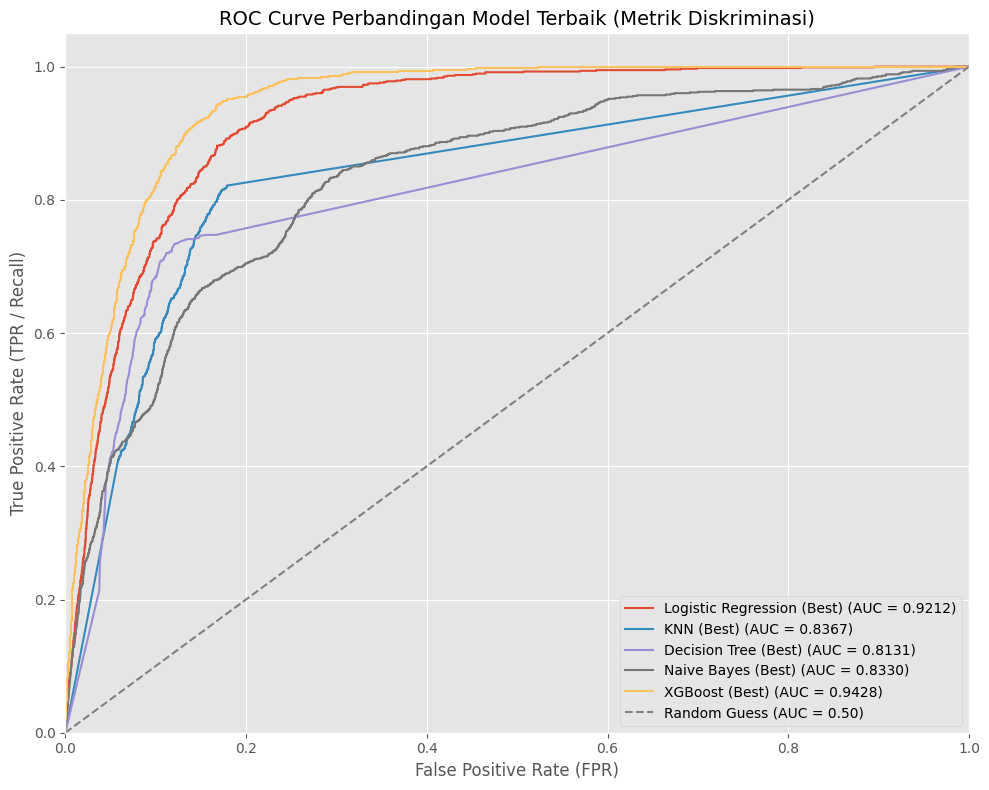


### Ringkasan AUC Model Terbaik ###
- XGBoost (Best): AUC = 0.9428
- Logistic Regression (Best): AUC = 0.9212
- KNN (Best): AUC = 0.8367
- Naive Bayes (Best): AUC = 0.8330
- Decision Tree (Best): AUC = 0.8131


In [ ]:
# Import library yang digunakan
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Model terbaik untuk ROC
models_best_for_roc = {
    'Logistic Regression (Best)': best_log_reg,
    'KNN (Best)': best_knn,
    'Decision Tree (Best)': best_tree,
    #'Random Forest (Best)': best_rf,
    'Naive Bayes (Best)': best_nb,
    'XGBoost (Best)': best_xgb,
    #'ANN (Best)': best_ann,
}

# Ukuran figure
plt.figure(figsize=(10, 8))
roc_aucs = {}

# Loop untuk menghitung AUC dan Plot ROC Curve
for name, model in models_best_for_roc.items():

    # Probabilitas kelas positif
    y_proba = model.predict_proba(X_test)[:, 1]

    # Hitung ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_proba)

    # Hitung AUC
    roc_auc = auc(fpr, tpr)
    roc_aucs[name] = roc_auc

    # Plot Kurva
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.4f})')

# Plot garis acuan
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Random Guess (AUC = 0.50)')

# Pengaturan Plot
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)', fontsize=12)
plt.ylabel('True Positive Rate (TPR / Recall)', fontsize=12)
plt.title('ROC Curve Perbandingan Model Terbaik (Metrik Diskriminasi)', fontsize=14)
plt.legend(loc="lower right", fontsize=10)
plt.grid(True)
plt.tight_layout()
plt.show()

# Menampilkan Ringkasan AUC
print("\n### Ringkasan AUC Model Terbaik ###")
sorted_aucs = sorted(roc_aucs.items(), key=lambda item: item[1], reverse=True)
for name, score in sorted_aucs:
    print(f"- {name}: AUC = {score:.4f}")

## Analisis SHAP (XGBoost)



In [68]:
import shap
import numpy as np
import matplotlib.pyplot as plt

shap.initjs()

model = best_xgb

# SHAP Explainer
explainer = shap.TreeExplainer(model)

# SHAP values untuk data test
shap_values = explainer.shap_values(X_test)

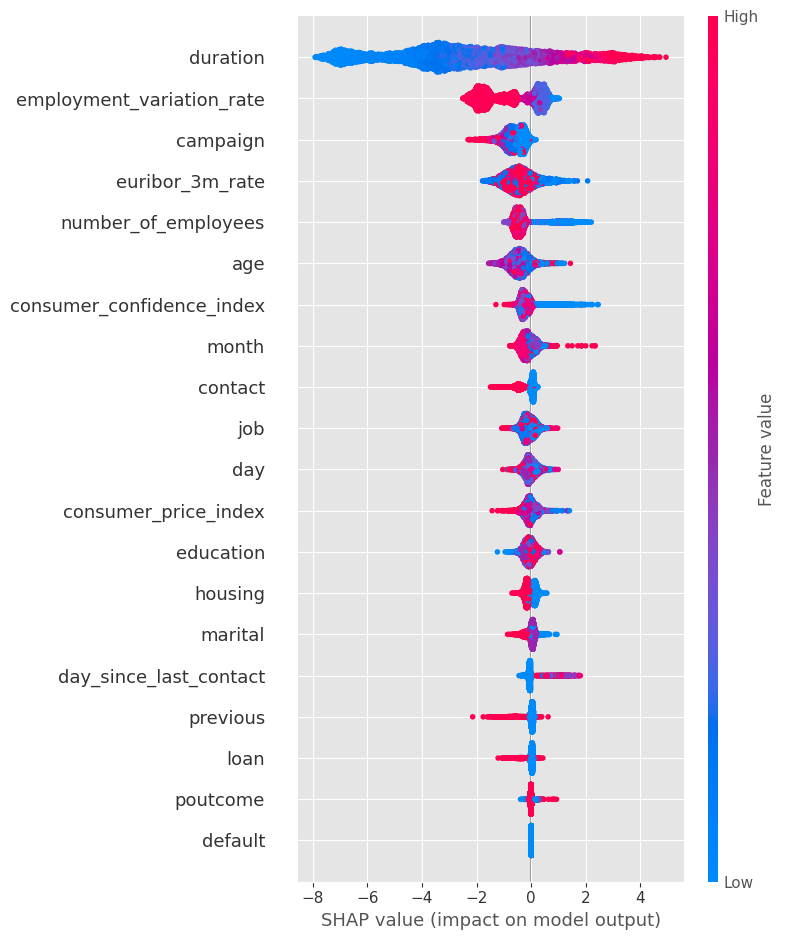

In [69]:
# SHAP Summary Plot (Dot Plot)
plt.figure(figsize=(10,6))
shap.summary_plot(shap_values, X_test, plot_type="dot")

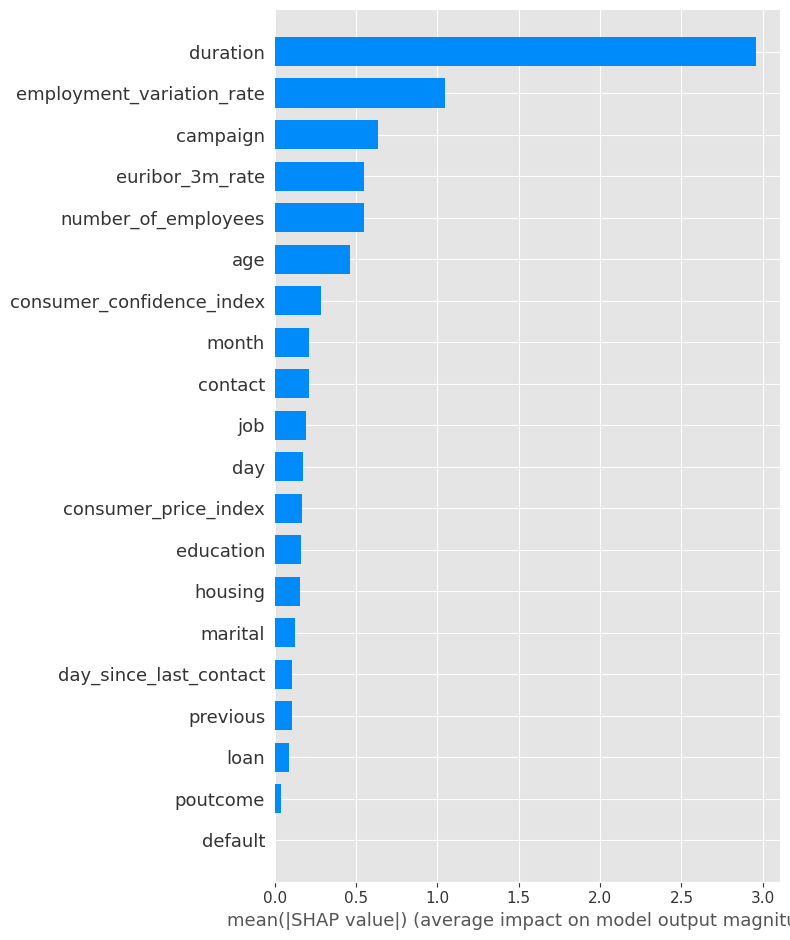

In [72]:
# SHAP Bar Plot
plt.figure(figsize=(15,8))
shap.summary_plot(shap_values, X_test, plot_type="bar")

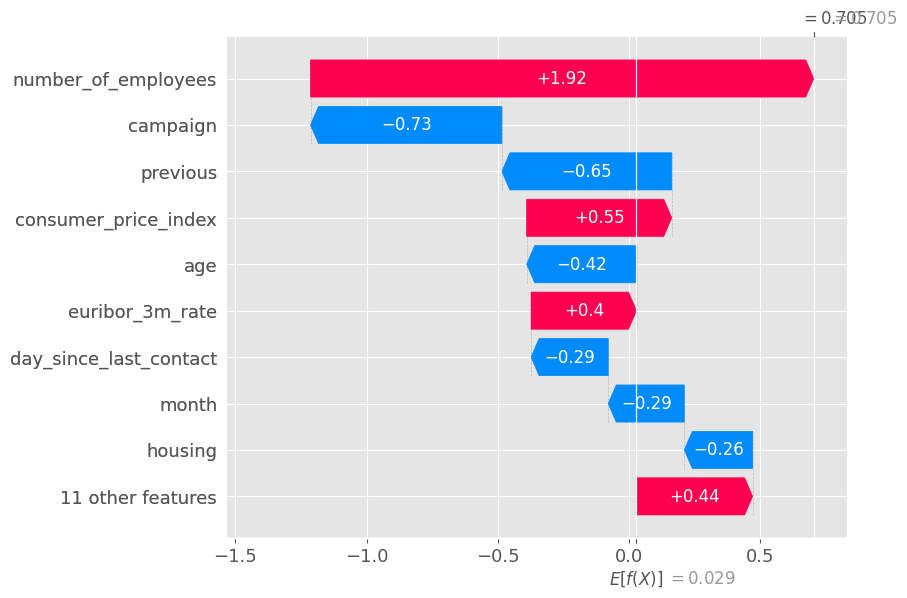

In [73]:
# SHAP Waterfall untuk 1 Contoh Nasabah
idx = 0
shap.plots._waterfall.waterfall_legacy(
    explainer.expected_value,
    shap_values[idx],
    feature_names=X_test.columns
)

## Threshold Optimization

In [75]:
# Probabilitas
y_pred_proba = best_xgb.predict_proba(X_test)[:, 1]
y_proba_percent = (y_pred_proba * 100).round(2)

In [76]:
# Cari threshold terbaik
from sklearn.metrics import f1_score
thresholds = [i/100 for i in range(1,100)]
f1_scores = []

for t in thresholds:
    y_pred_t = (y_pred_proba >= t).astype(int)
    f1_scores.append(f1_score(y_test, y_pred_t))

best_t = thresholds[f1_scores.index(max(f1_scores))]
print("Best Threshold:", best_t)

Best Threshold: 0.33


In [77]:
# Prediksi dengan threshold terbaik
y_pred_opt = (y_pred_proba >= best_t).astype(int)
print(classification_report(y_test, y_pred_opt))

              precision    recall  f1-score   support

           0       0.97      0.92      0.94      7281
           1       0.55      0.78      0.64       954

    accuracy                           0.90      8235
   macro avg       0.76      0.85      0.79      8235
weighted avg       0.92      0.90      0.91      8235



In [78]:
# Simpan threshold otomatis
import json
json.dump({"threshold": float(best_t)}, open("xgb_threshold.json", "w"))

In [79]:
# Buat dataframe hasil prediksi

hasil = pd.DataFrame({
    "probabilitas": y_pred_proba,
    "probabilitas_persen": y_proba_percent,
    "prediksi": y_pred_opt
})

hasil.head()

,probabilitas,probabilitas_persen,prediksi
0,0.669327,66.93,1
1,0.001063,0.11,0
2,0.000592,0.06,0
3,0.001233,0.12,0
4,0.001071,0.11,0


## Penambahan Data Dummy untuk tampilan identitas di Dashboard

In [80]:
! pip install Faker

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 19.2 MB/s eta 0:00:00


In [81]:
from faker import Faker

fake = Faker("id_ID")
jumlah_baris_test = len(X_test)

# BUAT DATA DUMMY
df_dummy = pd.DataFrame({
    "nama_klien": [fake.name() for _ in range(jumlah_baris_test)],
    "no_telp": [fake.phone_number() for _ in range(jumlah_baris_test)],
    "lokasi": [fake.city() for _ in range(jumlah_baris_test)],
    "alamat_email": [fake.email() for _ in range(jumlah_baris_test)],
})

X_test_reset = X_test.reset_index(drop=True)

# GABUNG SEMUA DATAFRAME FINAL
hasil_final = pd.concat([
    df_dummy.reset_index(drop=True),
    X_test_reset,
    pd.DataFrame({
        "probabilitas": y_pred_proba,
        "probabilitas_persen": y_proba_percent,
        "prediksi": y_pred_opt
    }).reset_index(drop=True)
], axis=1)

print("Data dummy berhasil ditambahkan!")
hasil_final.head()

Data dummy berhasil ditambahkan!


,nama_klien,no_telp,lokasi,alamat_email,age,job,marital,education,default,housing,...,day_since_last_contact,previous,employment_variation_rate,consumer_price_index,consumer_confidence_index,euribor_3m_rate,number_of_employees,probabilitas,probabilitas_persen,prediksi
0,Halima Hakim,+62 (72) 074-9932,Bengkulu,jailanigaman@example.net,0.669493,4,1,6,0,1,...,-0.164041,1.670768,-0.752358,1.076783,0.648917,-1.578169,-2.815620,0.669327,66.93,1
1,"Cut Padma Rahmawati, S.I.Kom",+62 (984) 208-0314,Ternate,mriyanti@example.org,1.533179,9,1,6,0,0,...,-0.164041,-0.349561,0.839106,-0.227546,0.951435,0.774759,0.845203,0.001063,0.11,0
2,Karma Narpati,+62-007-527-8824,Palangkaraya,zwahyudin@example.com,-0.098228,0,1,6,0,0,...,-0.164041,-0.349561,-2.216506,-2.067426,2.312767,-1.628329,-2.069615,0.000592,0.06,0
3,Oni Wulandari,+62 (015) 048-7193,Prabumulih,cawisadinugroho@example.net,1.245284,0,1,3,0,1,...,-0.164041,1.670768,-1.197968,-1.179446,-1.231018,-1.338898,-0.940227,0.001233,0.12,0
4,Yance Maheswara,+62 (0040) 528 4304,Pagaralam,cemetimandasari@example.org,-0.002263,9,1,5,0,1,...,-0.164041,-0.349561,0.648130,0.722627,0.886609,0.712491,0.331719,0.001071,0.11,0


In [84]:
from google.colab import files

# Simpan hasil final ke CSV
hasil_final.to_csv("hasil_final_dashboard.csv", index=False)

# Download file
files.download("hasil_final_dashboard.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>